In [29]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [30]:
redacted_df = pd.read_csv('./redacted-Results-Oct20-Mar21.csv')
print(redacted_df.keys())
redacted_df = redacted_df.drop(['notes'], axis=1)
print(redacted_df.keys())

Index(['id', 'notes', 'original_zip', 'match_kind', 'state_code',
       'county_code', 'tract_code', 'block_code', 'RRF Award Amount ',
       'No of months of assistance', 'Rent owing', 'RRF Award Type ',
       'Mthly Self Employment', 'Mthly Unemployment',
       'Mthly Interest or Dividend', 'Mthly Pension or Retirement',
       'Mthly TANF/Public Assistance', 'Mthly Alimony income',
       'Mthly Armed Forces income', 'Mthly Other income'],
      dtype='object')
Index(['id', 'original_zip', 'match_kind', 'state_code', 'county_code',
       'tract_code', 'block_code', 'RRF Award Amount ',
       'No of months of assistance', 'Rent owing', 'RRF Award Type ',
       'Mthly Self Employment', 'Mthly Unemployment',
       'Mthly Interest or Dividend', 'Mthly Pension or Retirement',
       'Mthly TANF/Public Assistance', 'Mthly Alimony income',
       'Mthly Armed Forces income', 'Mthly Other income'],
      dtype='object')


<AxesSubplot: >

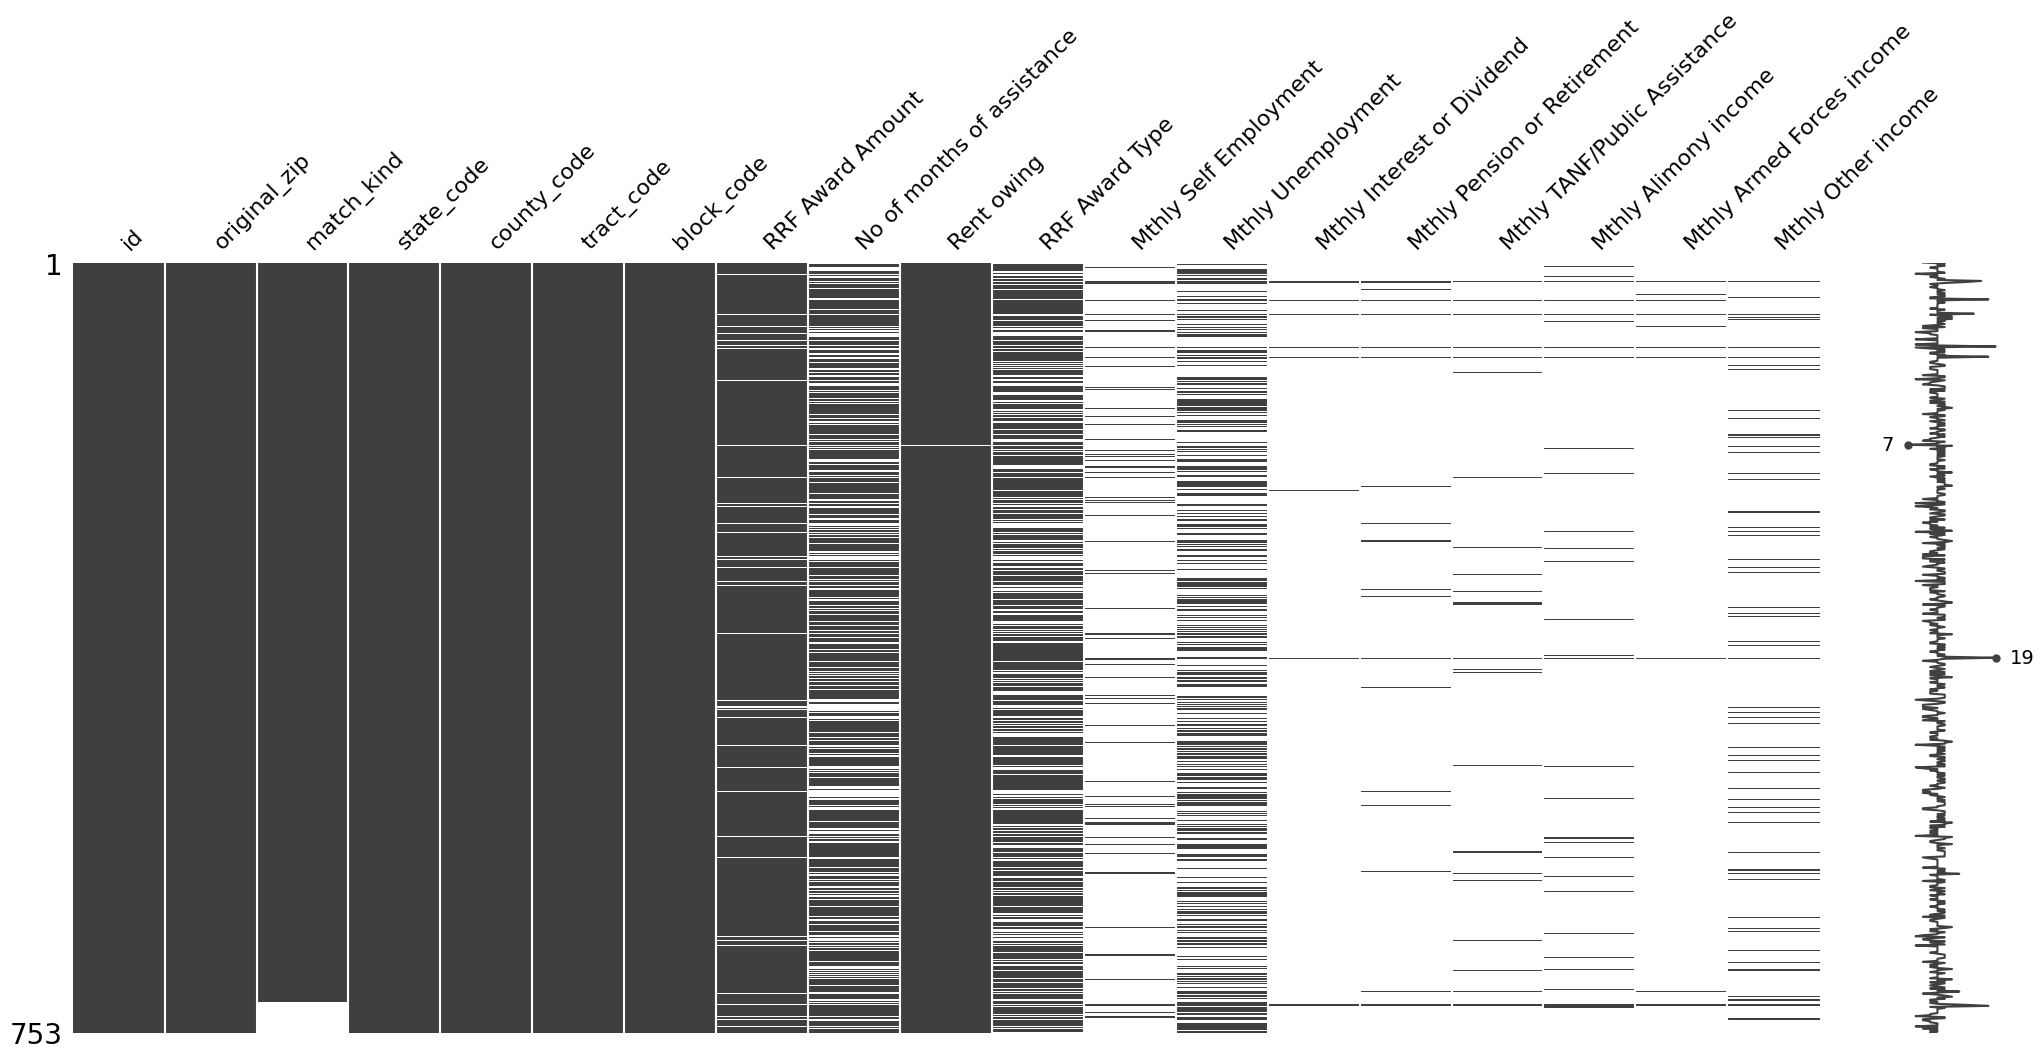

In [31]:
msno.matrix(redacted_df)

<AxesSubplot: >

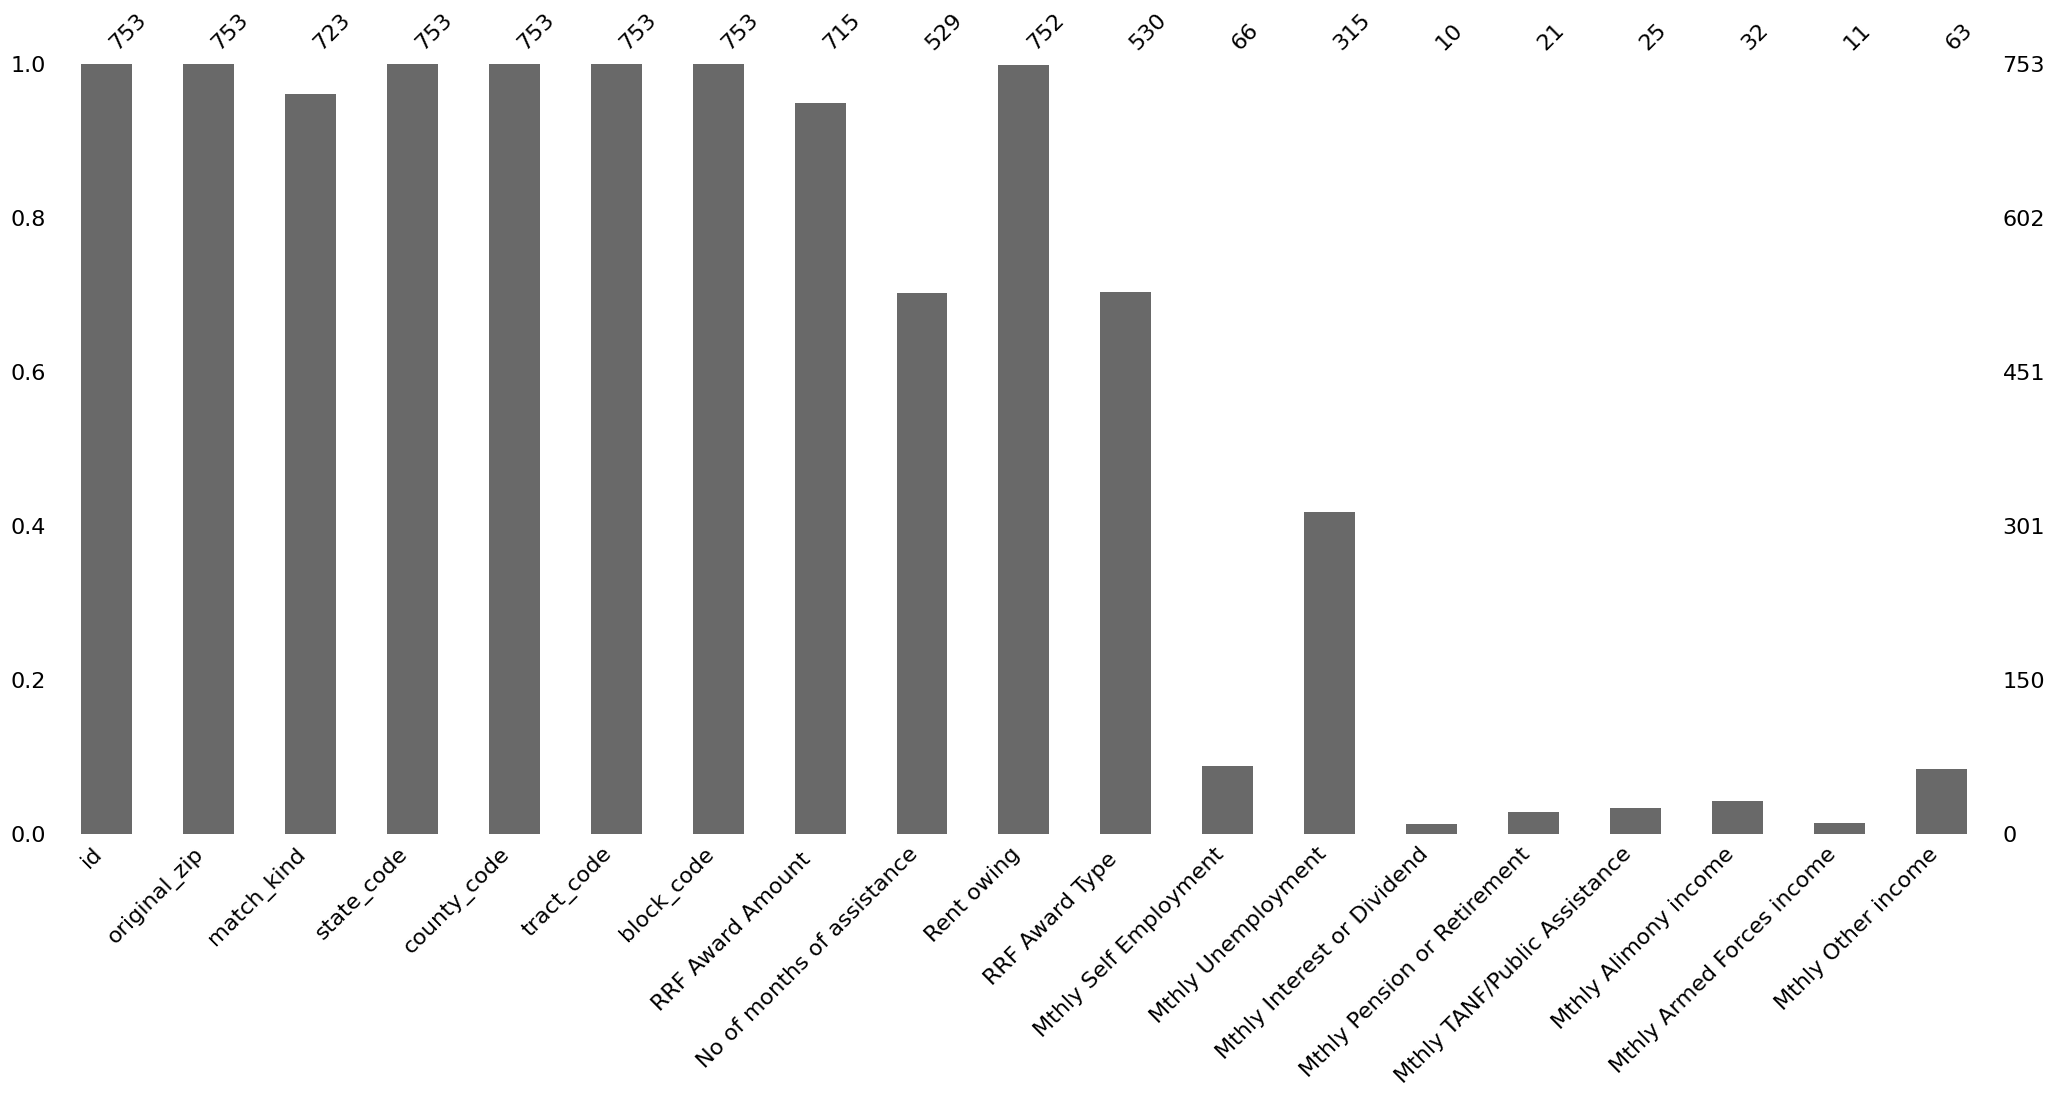

In [32]:
msno.bar(redacted_df)

In [33]:
redacted_df = redacted_df.fillna(0)
redacted_df

,id,original_zip,match_kind,state_code,county_code,tract_code,block_code,RRF Award Amount,No of months of assistance,Rent owing,RRF Award Type,Mthly Self Employment,Mthly Unemployment,Mthly Interest or Dividend,Mthly Pension or Retirement,Mthly TANF/Public Assistance,Mthly Alimony income,Mthly Armed Forces income,Mthly Other income
0,7,2119,Exact,25,25,81400,3003,6000.00,0.0,9444.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,2124,Exact,25,25,100300,3005,5700.00,3.0,1900.00,Arrears & Future payments,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0
2,56,2119,Exact,25,25,80100,1051,3750.00,6.0,4375.00,Arrears,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,63,2128,Exact,25,25,51200,3000,4000.00,1.0,4000.00,Arrears & Future payments,0.0,0.0,0.0,0.0,0.0,530.0,0.0,0.0
4,75,2128,Exact,25,25,50101,3001,6000.00,0.0,7900.00,Arrears,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,9192,2113,0,25,25,30400,3003,4000.00,0.0,4797.39,0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
749,9219,2127,0,25,25,60501,3003,2032.07,1.0,1990.00,Arrears,0.0,2300.0,0.0,0.0,0.0,0.0,0.0,0.0
750,9419,2128,0,25,25,50600,2007,4000.00,4.0,0.00,Arrears,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
751,9446,2120,0,25,25,81102,1001,6000.00,4.0,1500.00,Future payments,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0


0.0    224
3.0    218
2.0    118
4.0     77
1.0     72
5.0     27
6.0     17
Name: No of months of assistance, dtype: int64


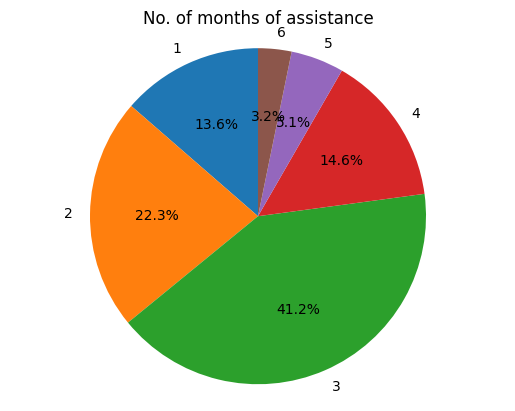

<AxesSubplot: >

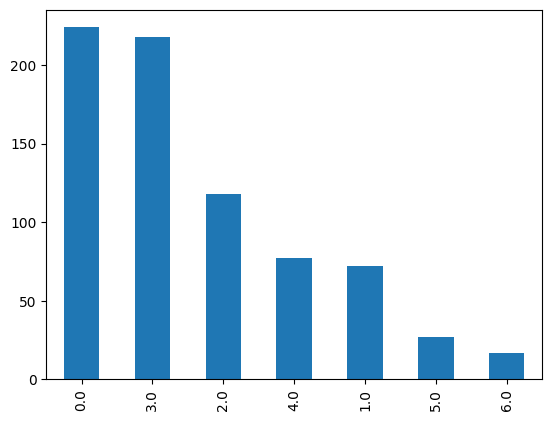

In [34]:
print(redacted_df['No of months of assistance'].value_counts())
AssistanceMonth1 = redacted_df[redacted_df['No of months of assistance'] == 1]['No of months of assistance'].value_counts()
AssistanceMonth2 = redacted_df[redacted_df['No of months of assistance'] == 2]['No of months of assistance'].value_counts()
AssistanceMonth3 = redacted_df[redacted_df['No of months of assistance'] == 3]['No of months of assistance'].value_counts()
AssistanceMonth4 = redacted_df[redacted_df['No of months of assistance'] == 4]['No of months of assistance'].value_counts()
AssistanceMonth5 = redacted_df[redacted_df['No of months of assistance'] == 5]['No of months of assistance'].value_counts()
AssistanceMonth6 = redacted_df[redacted_df['No of months of assistance'] == 6]['No of months of assistance'].value_counts()

labels = '1', '2', '3', '4', '5', '6'

sizes = [AssistanceMonth1.values.item(), AssistanceMonth2.values.item(), AssistanceMonth3.values.item(), AssistanceMonth4.values.item(), AssistanceMonth5.values.item(), AssistanceMonth6.values.item()]

explode = (0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('No. of months of assistance')
plt.show()

redacted_df['No of months of assistance'].value_counts().plot.bar()

Arrears                      297
0                            223
Arrears & Future payments    177
Future payments               56
Name: RRF Award Type , dtype: int64


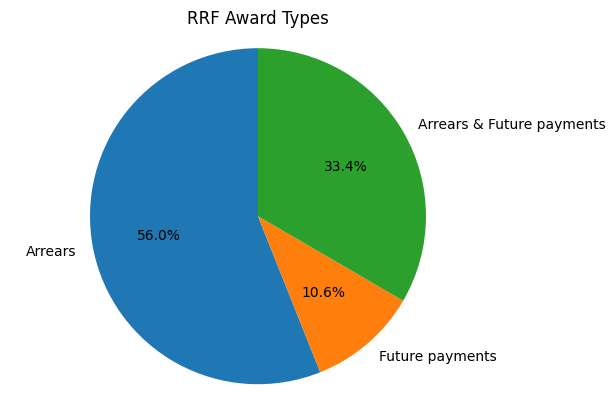

In [35]:
print(redacted_df['RRF Award Type '].value_counts())
AwardType1 = redacted_df[redacted_df['RRF Award Type '] == 'Arrears']['RRF Award Type '].value_counts()
AwardType2 = redacted_df[redacted_df['RRF Award Type '] == 'Future payments']['RRF Award Type '].value_counts()
AwardType3 = redacted_df[redacted_df['RRF Award Type '] == 'Arrears & Future payments']['RRF Award Type '].value_counts()

labels = 'Arrears', 'Future payments', 'Arrears & Future payments'

sizes = [AwardType1.values.item(), AwardType2.values.item(), AwardType3.values.item()]

explode = (0, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('RRF Award Types')
plt.show()

In [36]:
def plotvals(df, label1, label2):
    fig, ax = plt.subplots()
    ax.bar(df[label1].values, df[label2].values)
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.xlabel(f"{label1}")
    plt.ylabel(f"{label2}")
    plt.title(f"{label1} vs {label2}")
    plt.show()

,original_zip,Rent owing Sum
0,2108,42005.00
1,2109,15150.00
2,2111,59279.69
3,2113,15291.09
4,2114,33274.61
5,2115,15938.00
6,2116,17774.00
7,2118,23948.00
8,2119,182456.77
9,2120,10375.00


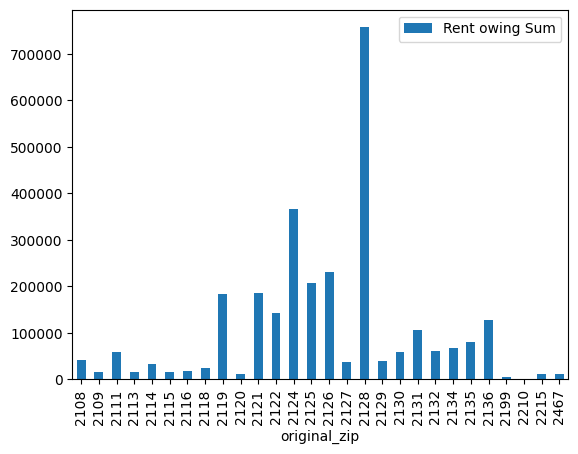

In [37]:
df4 = redacted_df[['original_zip', 'Rent owing']]
df4 = df4.groupby('original_zip')['Rent owing'].sum().reset_index(name="Rent owing Sum")
df4.plot.bar(x='original_zip', y='Rent owing Sum')
df4

,original_zip,RRF Amount Given
0,2108,12000.00
1,2109,18750.00
2,2111,79732.00
3,2113,23935.00
4,2114,25170.00
5,2115,31110.00
6,2116,19574.00
7,2118,49616.00
8,2119,217105.45
9,2120,15879.00


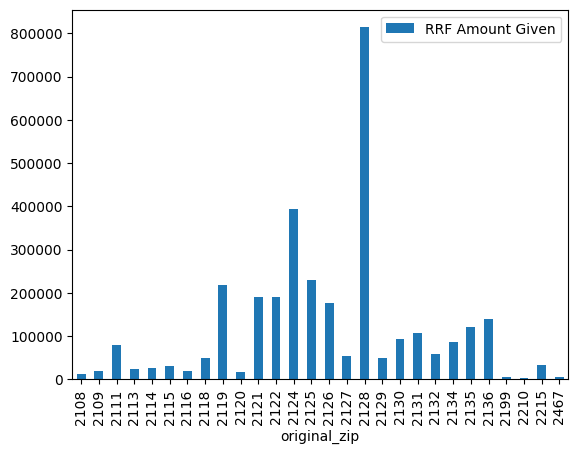

In [38]:
df1 = redacted_df[['original_zip', 'RRF Award Amount ']]
df1 = df1.groupby('original_zip')['RRF Award Amount '].sum().reset_index(name="RRF Amount Given")
df1.plot.bar(x='original_zip', y='RRF Amount Given')
df1

,original_zip,Rent owing Sum,RRF Amount Given,Difference
0,2108,42005.00,12000.00,-30005.00
1,2109,15150.00,18750.00,3600.00
2,2111,59279.69,79732.00,20452.31
3,2113,15291.09,23935.00,8643.91
4,2114,33274.61,25170.00,-8104.61
5,2115,15938.00,31110.00,15172.00
6,2116,17774.00,19574.00,1800.00
7,2118,23948.00,49616.00,25668.00
8,2119,182456.77,217105.45,34648.68
9,2120,10375.00,15879.00,5504.00


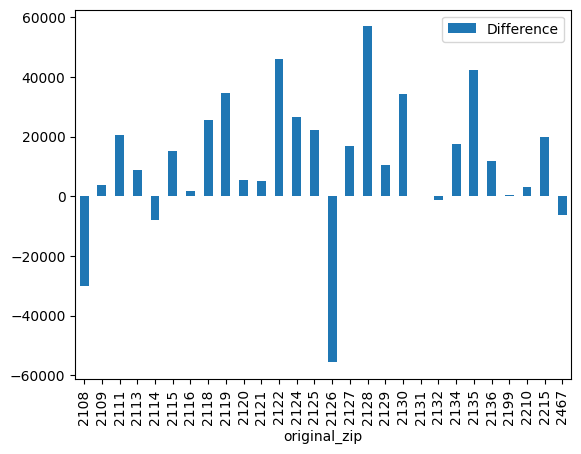

In [39]:
df5 = df4.merge(df1)
df5['Difference'] = df5['RRF Amount Given'] - df5['Rent owing Sum']
df5.plot.bar(x='original_zip', y='Difference')
df5

,RRF Award Type,RRF Award Sum
0,0,822421.00
1,Arrears,1422046.82
2,Arrears & Future payments,802102.02
3,Future payments,195317.00


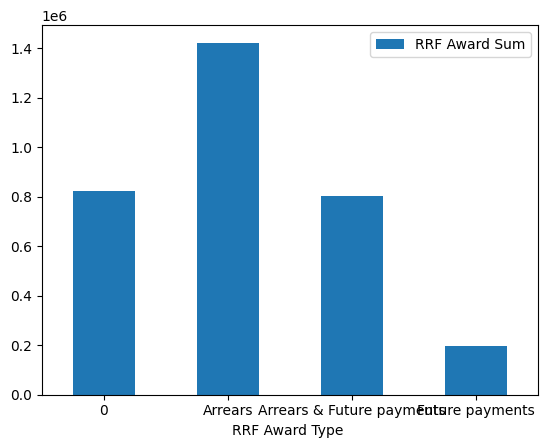

In [40]:
df2 = redacted_df[['RRF Award Amount ', 'RRF Award Type ']]
df2 = df2.groupby('RRF Award Type ')['RRF Award Amount '].sum().reset_index(name='RRF Award Sum')
df2.plot.bar(x='RRF Award Type ', y='RRF Award Sum', rot=0)
df2

,No of months of assistance,RRF Award Sum
0,0.0,926195.00
1,1.0,263170.07
2,2.0,465894.00
3,3.0,961716.52
4,4.0,395099.25
5,5.0,143167.00
6,6.0,86645.00


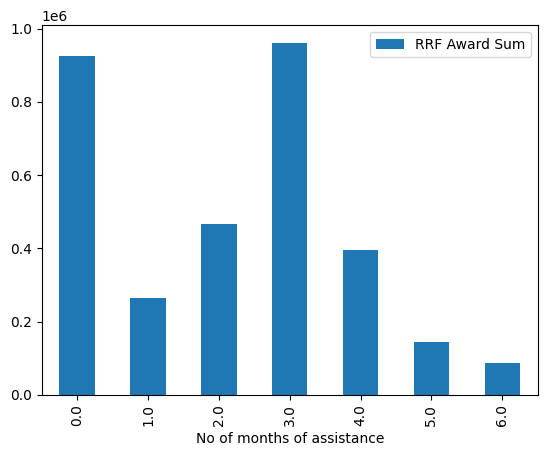

In [41]:
df3 = redacted_df[['RRF Award Amount ', 'No of months of assistance']]
df3 = df3.groupby('No of months of assistance')['RRF Award Amount '].sum().reset_index(name='RRF Award Sum')
df3.plot.bar(x='No of months of assistance', y='RRF Award Sum')
df3

Neighborhood
Allston                          59
Back Bay                        187
Beacon Hill                      59
Brighton                         83
Charlestown                      44
Chinatown/Financial District     72
Dorchester                      306
Downtown                        105
Downtown/Financial District       1
Downtown/North End               44
East Boston                     121
Fenway/Kenmore                   92
Hyde Park                        61
Jamaica Plain                   117
Mattapan                         31
Mission Hill/Roxbury             16
North End                        22
Roslindale                       85
Roxbury                          67
South Boston                     73
South Boston Waterfront          29
South End                       106
West Roxbury                     68
Name: Business Name, dtype: int64

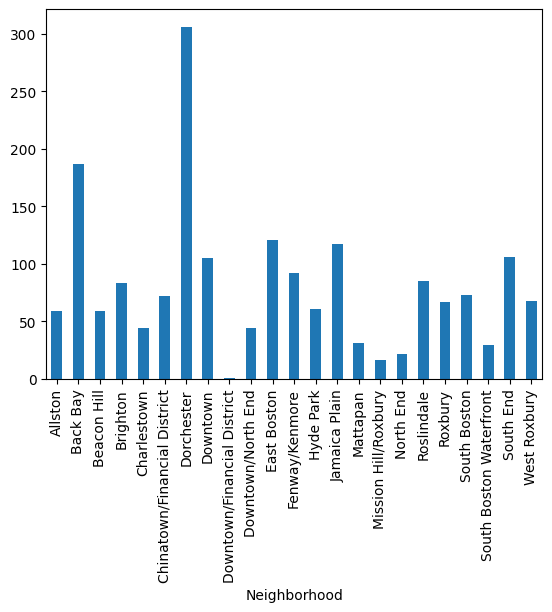

In [42]:
recipients_df = pd.read_csv("./small business relief grant recipients 2020.csv")
df6 = recipients_df.groupby('Neighborhood')['Business Name'].count()
df6.plot.bar()
df6